# Flight Price Prediction

Problem statement: Predicting the prices of flights.

    
Features:
  
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
# importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Flight Price Prediction_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.shape

(10683, 11)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#In additional info there are entries as NO info.

In [7]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [8]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [9]:
# Out of 10683 there are 8345 Null values present.
# keeping this will hamper out model prediction so I am dropping this column.

In [10]:
df.drop(columns=['Additional_Info'],inplace=True)

In [11]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


In [12]:
# checking Null vales

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

There are only 2 null values in the data set,
to maintain the quality and riches of the data I'm dropping these two null values.

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

------  >             Now we have soomthing to proceed with.

In [18]:
## Feature Engineering

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

From these columns in particular I'll extract data.
.
.
.
- Date_of_Journey is in date  time format.
- We have multiple points in Route.
- Dep_Time is in date time format.
- Arrival_Time is in date  time format.
- Duration is in date  time format.
- Total Stops

In [22]:
##### First I'll extact date and months from columns and create seperate columns.

In [23]:
#Extracting date time from Date_ofJourney.


df['JourneyDate']=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day


In [24]:
df['JourneyMonth']=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,JourneyDate,JourneyMonth
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3


In [26]:
#dropping Date_of_Journey

df.drop(columns=['Date_of_Journey'],inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,JourneyDate,JourneyMonth
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3


In [28]:
# Extracting Departure time 


df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour

In [29]:
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [30]:
# Now dropping the Dep_Time
df.drop(columns=['Dep_Time'],inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,13302,1,3,16,50


In [32]:
#extracting Arrival time

df['Arrival_hr']=pd.to_datetime(df.Arrival_Time).dt.hour

df['Arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute

df.drop(columns=['Arrival_Time'],inplace=True)

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


###### Extracting duraion..

So in duration column
- I'm going to split the data in betwwn hr and mins
- check null values in new columns..
- clean it further..
- then convert hrs in mins by multi by 60
- then adding converted mins to mins..
- then adding new data in main data frame..

I'm using split function to extract betwwn H and min..


In [36]:

df['Duration'].str.split('h')

0        [2,  50m]
1        [7,  25m]
2           [19, ]
3        [5,  25m]
4        [4,  45m]
           ...    
10678    [2,  30m]
10679    [2,  35m]
10680        [3, ]
10681    [2,  40m]
10682    [8,  20m]
Name: Duration, Length: 10682, dtype: object

In [37]:
d=df['Duration'].str.split('h',expand=True)

In [38]:
d

,0,1
0,2,50m
1,7,25m
2,19,
3,5,25m
4,4,45m
...,...,...
10678,2,30m
10679,2,35m
10680,3,
10681,2,40m


In [39]:
d.isnull().sum()

0    0
1    1
dtype: int64

In [40]:
 d[1] = d[1].fillna(0)

In [41]:
d.rename(columns={0:'Duration_Hrs',1:'Duration_mins'},inplace=True)

In [42]:
d

,Duration_Hrs,Duration_mins
0,2,50m
1,7,25m
2,19,
3,5,25m
4,4,45m
...,...,...
10678,2,30m
10679,2,35m
10680,3,
10681,2,40m


In [43]:
d['Duration_mins'].unique()

array([' 50m', ' 25m', '', ' 45m', ' 30m', ' 5m', ' 15m', ' 35m', ' 10m',
       ' 20m', ' 55m', ' 40m', 0], dtype=object)

In [44]:
d['Duration_mins']=d.Duration_mins.str.replace(' None','0')

In [45]:
v=d['Duration_mins'].str.split(' ',expand=True)

In [46]:
v

,0,1
0,,50m
1,,25m
2,,None
3,,25m
4,,45m
...,...,...
10678,,30m
10679,,35m
10680,,None
10681,,40m


In [47]:
# further splitting coluns to extract just the numbers...

In [48]:
a=v[1].str.split('m',expand =True)

In [49]:
a

,0,1
0,50,
1,25,
2,None,None
3,25,
4,45,
...,...,...
10678,30,
10679,35,
10680,None,None
10681,40,


In [50]:
a.rename(columns={0:'min'}, inplace= True)

In [51]:
a['min'].unique()

array(['50', '25', None, '45', '30', '5', '15', '35', '10', '20', '55',
       '40', nan], dtype=object)

In [52]:
a['min']=a['min'].fillna(0)

In [53]:
a['min'].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [54]:
a['min']=a['min'].astype(str).astype(int)

In [55]:
a.dtypes

min     int32
1      object
dtype: object

In [56]:
#concatnating two dataframes.....



dur=pd.concat([a,d],axis=1)

In [57]:
dur

,min,1,Duration_Hrs,Duration_mins
0,50,,2,50m
1,25,,7,25m
2,0,None,19,
3,25,,5,25m
4,45,,4,45m
...,...,...,...,...
10678,30,,2,30m
10679,35,,2,35m
10680,0,None,3,
10681,40,,2,40m


In [58]:
# DROPPING COLUMNS

dur.drop(columns=[1,'Duration_mins'],inplace=True)

In [59]:
dur

,min,Duration_Hrs
0,50,2
1,25,7
2,0,19
3,25,5
4,45,4
...,...,...
10678,30,2
10679,35,2
10680,0,3
10681,40,2


In [60]:
dur['Duration_Hrs'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [61]:
dur['Duration_Hrs']=dur.Duration_Hrs.str.replace('5m','0')

In [62]:
dur['Duration_Hrs']=dur['Duration_Hrs'].astype(str).astype(int)

In [63]:
#coverting hrs to mins...

dur['Duration_Hrs']=dur['Duration_Hrs']*60

In [64]:
dur['Duration_Hrs']

0         120
1         420
2        1140
3         300
4         240
         ... 
10678     120
10679     120
10680     180
10681     120
10682     480
Name: Duration_Hrs, Length: 10682, dtype: int32

In [65]:
#adding Converted hr and mins....



dur['Total_Duration(mins)']=dur.sum(axis=1)

In [66]:
dur

,min,Duration_Hrs,Total_Duration(mins)
0,50,120,170
1,25,420,445
2,0,1140,1140
3,25,300,325
4,45,240,285
...,...,...,...
10678,30,120,150
10679,35,120,155
10680,0,180,180
10681,40,120,160


In [67]:
# now i'll be dropping min and hrs column 


dur.drop(columns=['min','Duration_Hrs'],inplace=True)

In [68]:
dur

,Total_Duration(mins)
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [69]:
#concatnating two dataframes.

df=pd.concat([df,dur],axis=1)

In [70]:
# dropping duration column from dataframe


df.drop(columns=['Duration'],inplace=True)

In [71]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,285


In [72]:
###### Route and stops are working in the same manner..

# Number of stops are equal to Routs

#so dropping route column

df.drop(columns=['Route'],inplace=True)

In [73]:
df

,Airline,Source,Destination,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,160


In [74]:
# EDA

In [75]:
### Univariate Analysis.

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


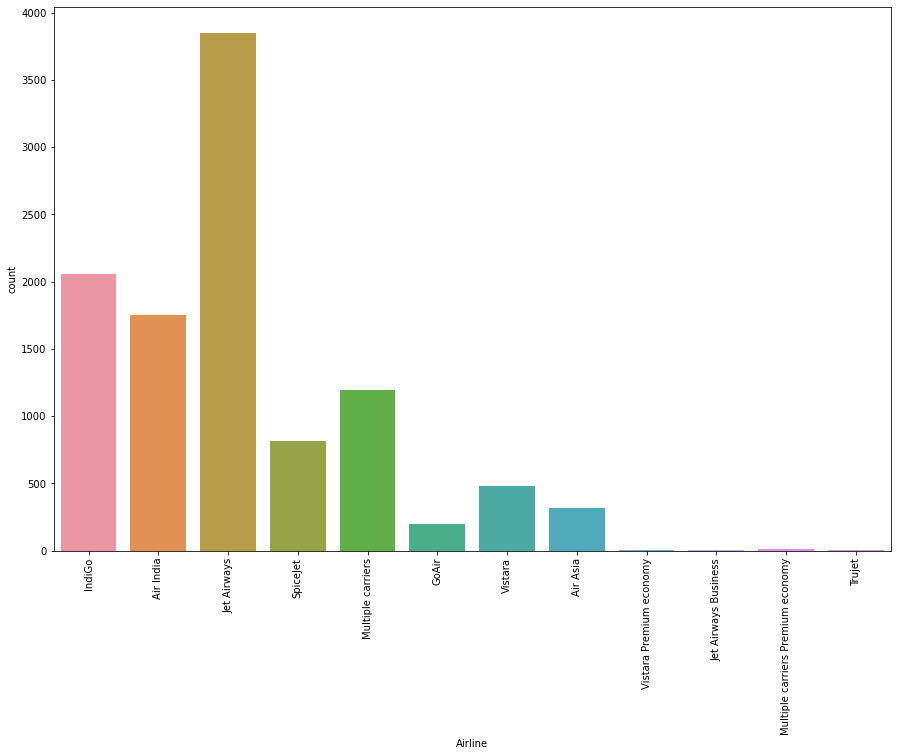

In [76]:
# Airline

print(df["Airline"].value_counts())

plt.figure(figsize=(15,10))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)
plt.show()

- Jet Airways is the most used flight
- Trujet is the least.
- While Indigo is the second most choice of passengers.


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


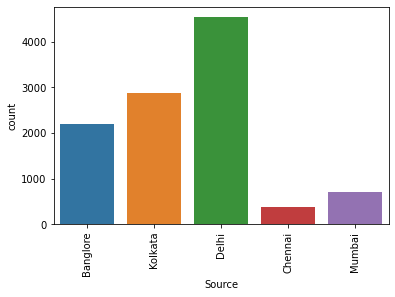

In [78]:
# Source

print(df["Source"].value_counts())

ax=sns.countplot(df['Source'])
plt.xticks(rotation=90)
plt.show()

- Mostly flights are departing from delhi
- then comes kolkata
- Chennai has the least deparing flights.

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


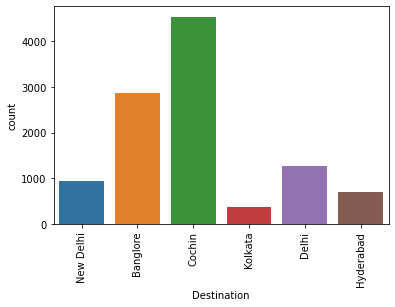

In [80]:
# Destination

print(df["Destination"].value_counts())

ax=sns.countplot(df['Destination'])
plt.xticks(rotation=90)
plt.show()

- Mostly the destination is cochin
- Bangalore being the second highest destination point.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


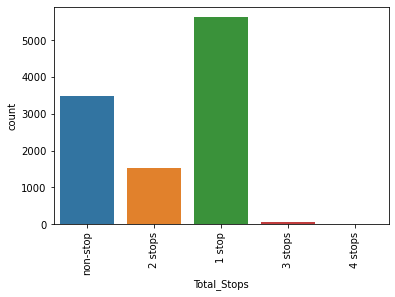

In [81]:
# Total_Stops

print(df["Total_Stops"].value_counts())

ax=sns.countplot(df['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

- 5625 fights have atleast 1 stop 
- Non-Stop  flights have second preference
- There is only 1 flight that has 4 stops.

9     1406
6     1287
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: JourneyDate, dtype: int64


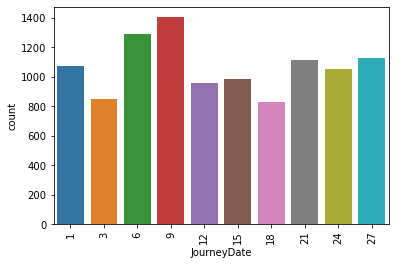

In [83]:
# JourneyDate

print(df["JourneyDate"].value_counts())

ax=sns.countplot(df['JourneyDate'])
plt.xticks(rotation=90)
plt.show()

- Most prefered date is 9th.
- Least prefered date is 18th

5    3465
6    3414
3    2724
4    1079
Name: JourneyMonth, dtype: int64


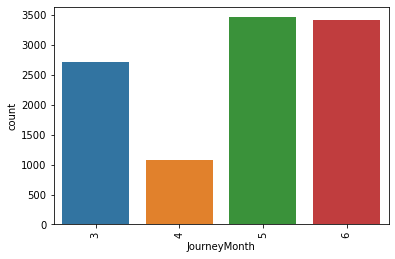

In [85]:
# JourneyMonth


print(df["JourneyMonth"].value_counts())

ax=sns.countplot(df['JourneyMonth'])
plt.xticks(rotation=90)
plt.show()

- May  and June is the most travelled months,
- while April being the least.

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hr, dtype: int64


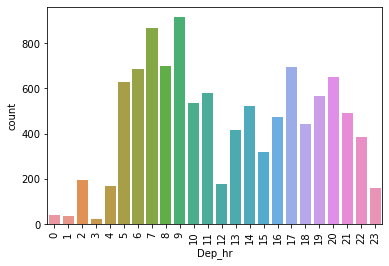

In [86]:
# Dep_hr

print(df["Dep_hr"].value_counts())

ax=sns.countplot(df['Dep_hr'])
plt.xticks(rotation=90)
plt.show()

- Most (915) fights are taking off at 9AM.
- Only 24 flights are taking off at 3AM, making it the least dep time.


19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      489
23     485
10     476
8      471
7      417
20     377
16     370
0      322
13     308
11     298
14     295
17     191
15     182
2       79
5       69
6       52
3       47
Name: Arrival_hr, dtype: int64


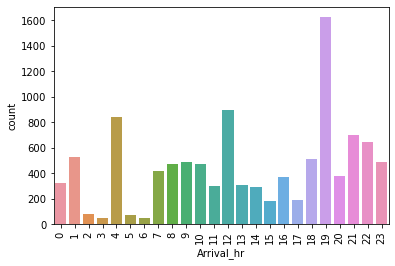

In [87]:
# Arrival_hr


print(df["Arrival_hr"].value_counts())

ax=sns.countplot(df['Arrival_hr'])
plt.xticks(rotation=90)
plt.show()

- Mostly flights are Arriving (landing) at 1900 hrs i.e (7)
- There are only 3 flights that are landing at 3AM.

170     550
90      386
175     337
165     337
155     329
       ... 
250       1
2025      1
1825      1
2480      1
0         1
Name: Total_Duration(mins), Length: 368, dtype: int64


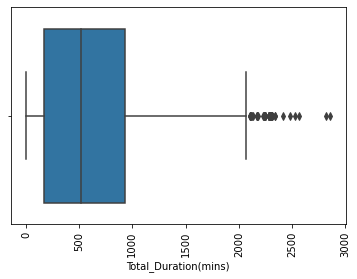

In [88]:
# Duration

print(df["Total_Duration(mins)"].value_counts())

ax=sns.boxplot(df['Total_Duration(mins)'])
plt.xticks(rotation=90)
plt.show()

- Majorly the flights are flying for 500 mins.
- There are very few flights who flew for more than 2000 mins.

In [89]:
### BiVariate and Multi-Variate Analysis

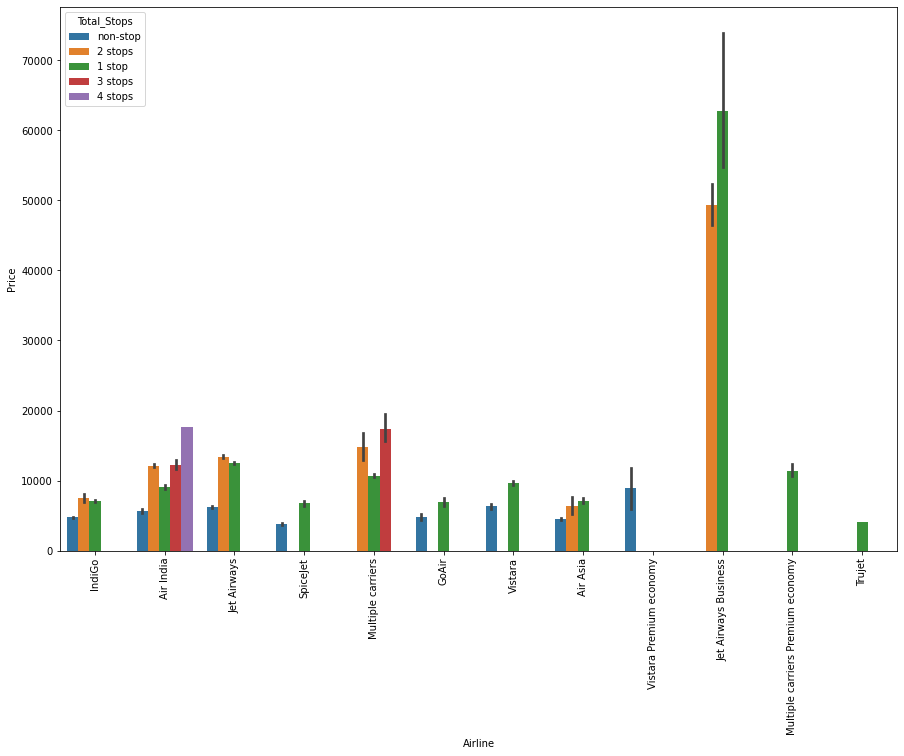

In [90]:
plt.figure(figsize=(15,10))
sns.barplot(x='Airline',y='Price',hue='Total_Stops',data=df)
plt.xticks(rotation=90)
plt.show()

On the basis of Total Stops.

- Jet Business has the maximum pricce with 1 -2 stops.
- In terms of no of stops Air India is the one with all the flights having non-stop as well as 1-4 stops.
- While vistara Permium Economy has only Non stop Flights.

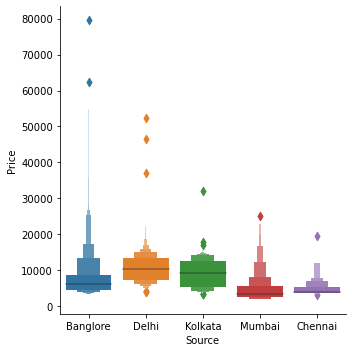

In [91]:
ax=sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.show()

- Banglore flights are having highest price.
- Delhi flight price mean is higher than banglore.

####### This also shows that there are few outliers, tho we won't be treating it as it is object data.

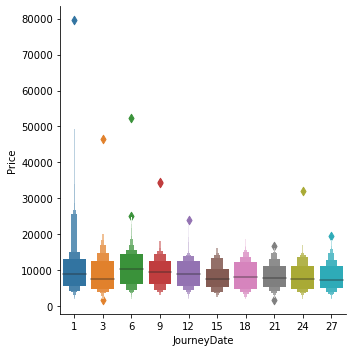

In [92]:
ax=sns.catplot(x='JourneyDate',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.show()

- Flight flying on 1st of any month are having Higher prices.
- while fights on 15th have comparitivly low price than of 1st.

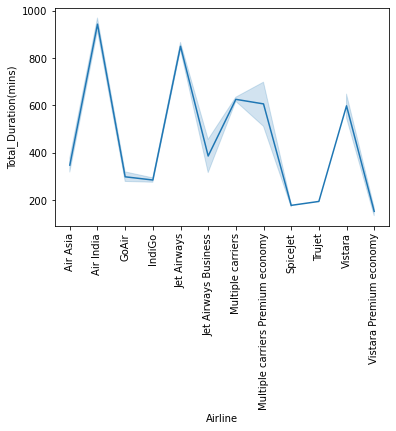

In [93]:
ax=sns.lineplot(x='Airline',y='Total_Duration(mins)',data=df)
plt.xticks(rotation=90)
plt.show()

- Spice Jet and Truejet have least flying mins.
- Whereas AirIndia have the maximum flying mins.
- Then there is JetAirways after AirIndia having most flying mins

In [94]:
### Encoding data for better visulisation.

In [95]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [96]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [97]:
df

,Airline,Source,Destination,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
0,3,0,5,4,3897,24,3,22,20,1,10,170
1,1,3,0,1,7662,1,5,5,50,13,15,445
2,4,2,1,1,13882,9,6,9,25,4,25,1140
3,3,3,0,0,6218,12,5,18,5,23,30,325
4,3,0,5,0,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,19,55,22,25,150
10679,1,3,0,4,4145,27,4,20,45,23,20,155
10680,4,0,2,4,7229,27,4,8,20,11,20,180
10681,10,0,5,4,12648,1,3,11,30,14,10,160


In [98]:
### Checking Correlation

In [99]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
Airline,1.000000,-0.013397,0.018446,0.035973,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092,-0.159650
Source,-0.013397,1.000000,-0.592576,-0.225605,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040,0.161884
Destination,0.018446,-0.592576,1.000000,0.337872,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196,-0.257353
Total_Stops,0.035973,-0.225605,0.337872,1.000000,-0.571221,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980,-0.602281
Price,-0.039565,0.015999,-0.071122,-0.571221,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.506478
JourneyDate,0.026137,0.004902,-0.041025,0.029225,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022438
JourneyMonth,0.024674,0.183268,-0.364682,-0.026328,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.014837
Dep_hr,-0.035269,0.059047,-0.072997,0.039224,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_min,-0.059922,-0.056998,0.127931,0.048901,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.019100
Arrival_hr,-0.007567,0.025635,-0.039729,-0.095650,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.051531


In [100]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                   1.000000
Total_Duration(mins)    0.506478
Arrival_hr              0.024244
Source                  0.015999
Dep_hr                  0.006799
Dep_min                -0.024458
Airline                -0.039565
Destination            -0.071122
Arrival_min            -0.086155
JourneyMonth           -0.103643
JourneyDate            -0.153774
Total_Stops            -0.571221
Name: Price, dtype: float64

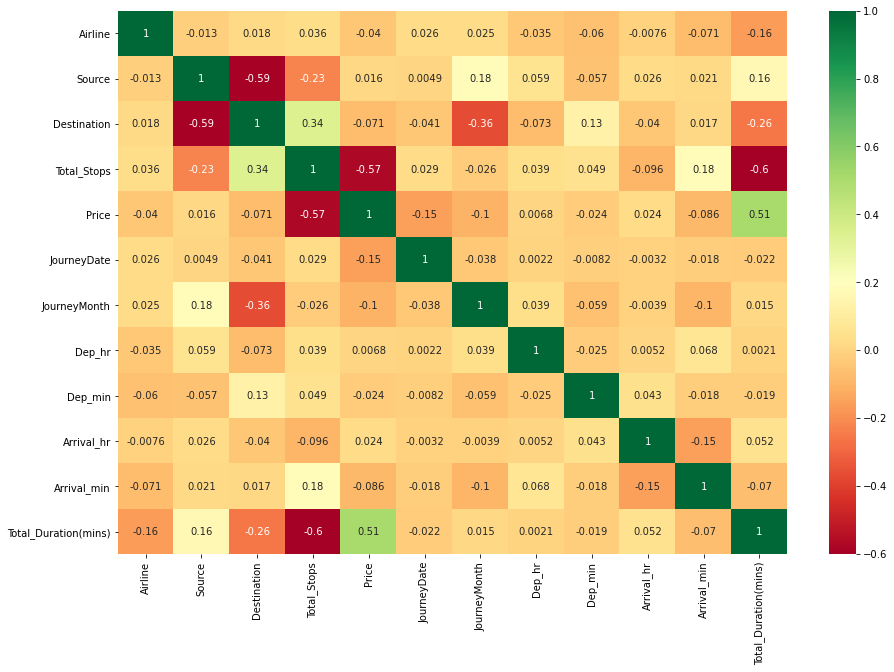

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

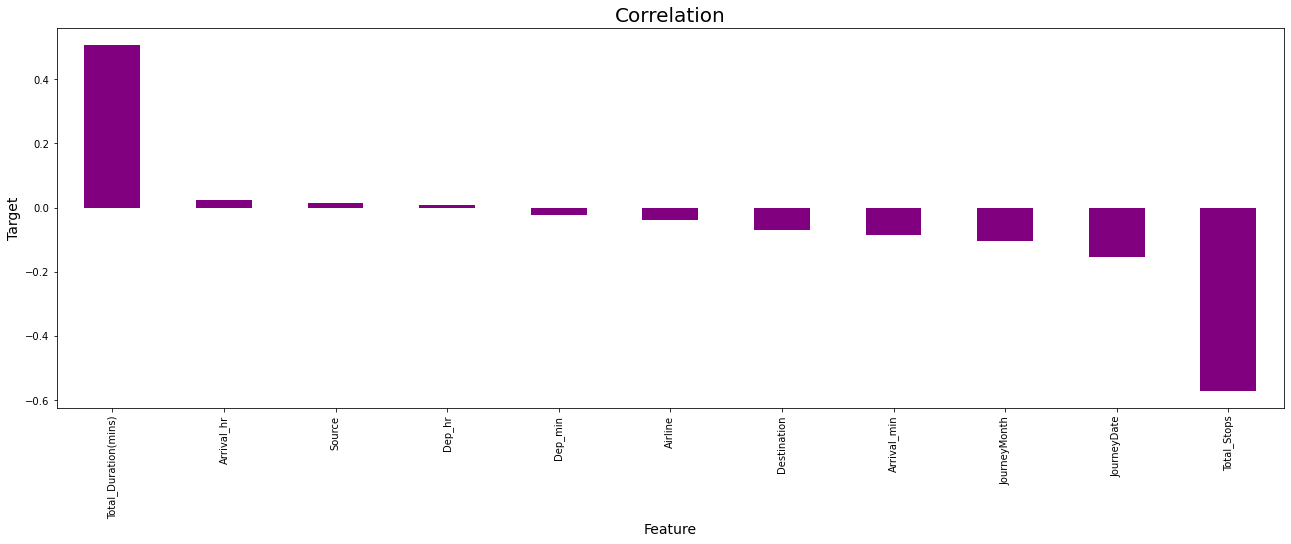

In [102]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

- Total Duration is most correated with the price
- while Total Stops is negativly corelated, which means the more the stops the more the price.

### Pre-processing pipeline

### checking outliers.

Airline
AxesSubplot(0.125,0.125;0.775x0.755)


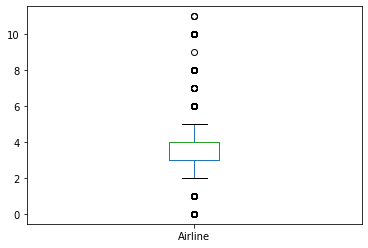

Source
AxesSubplot(0.125,0.125;0.775x0.755)


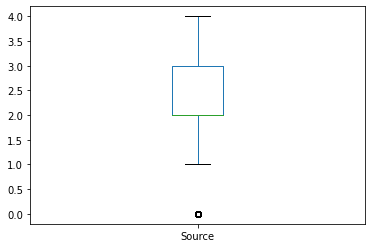

Destination
AxesSubplot(0.125,0.125;0.775x0.755)


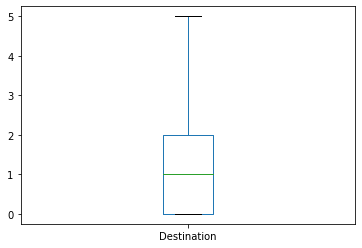

Total_Stops
AxesSubplot(0.125,0.125;0.775x0.755)


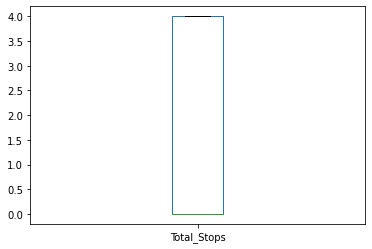

Price
AxesSubplot(0.125,0.125;0.775x0.755)


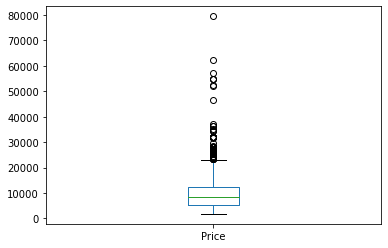

JourneyDate
AxesSubplot(0.125,0.125;0.775x0.755)


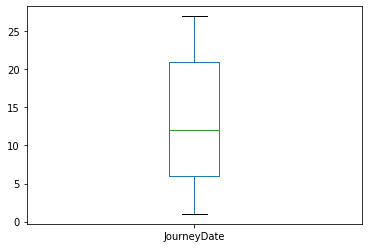

JourneyMonth
AxesSubplot(0.125,0.125;0.775x0.755)


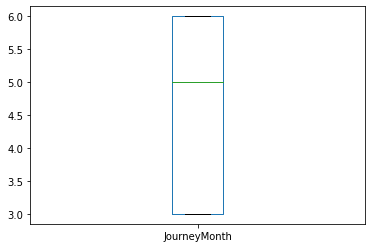

Dep_hr
AxesSubplot(0.125,0.125;0.775x0.755)


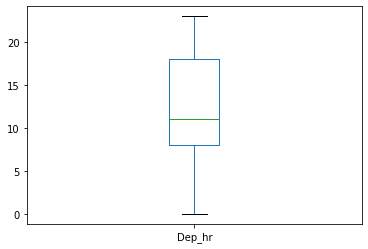

Dep_min
AxesSubplot(0.125,0.125;0.775x0.755)


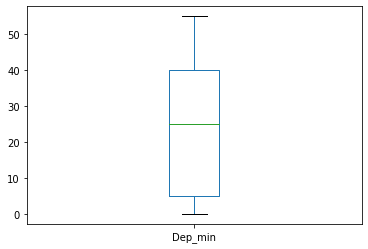

Arrival_hr
AxesSubplot(0.125,0.125;0.775x0.755)


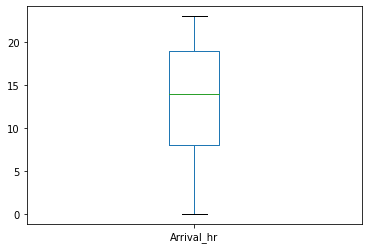

Arrival_min
AxesSubplot(0.125,0.125;0.775x0.755)


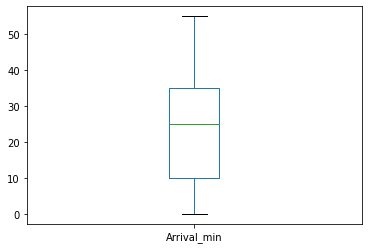

Total_Duration(mins)
AxesSubplot(0.125,0.125;0.775x0.755)


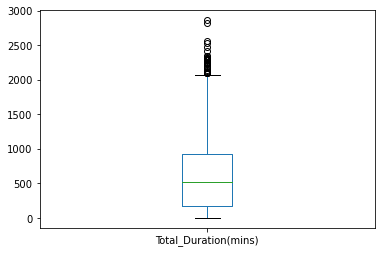

In [107]:
for i in df:
    print(i)
    print(df[i].plot.box())
    plt.show()

In [108]:
df['Total_Duration(mins)'].unique()

array([ 170,  445, 1140,  325,  285,  145,  930, 1265, 1530,  470,  795,
        155,  135,  730, 1595,  270, 1355, 1380, 1235,  310,  920,  175,
        800,  910,  345,  355,  805, 1320,  330,  625,  315,  150,  375,
        715,  665,  510, 1325,  165,  720,  965, 1195,  195, 1520,  180,
        975,  905,  390, 1505,  745, 1640,  615,  630,   90,   85, 1590,
        440,  810,  300, 1145,  890,  160, 1330,  575,  600, 1280, 1125,
        740, 1080,  555, 1050,  995,  735,  450, 1440,  535,  430,  870,
       1820,  900,  765,  610,  925,  845, 1215, 1390, 1090,  960,  140,
        480, 1015,  190,  840, 1430, 1300, 1275,  650,  495,  515,  710,
       1655,  505, 1255,  290,  490, 1465, 1415, 1545, 1570, 1730, 1515,
        560,  550,  185,  690,  570, 1055,  305, 1550, 1200,  780, 1105,
       1450,  295, 1535,  380, 1120, 1165, 1760,  545,  645,  700, 1375,
       2245, 1540,  835,  520, 1410,  755, 1455,   80,  660,  675,  875,
        775,  540,  460,  705, 1495, 1025, 1795, 13

There are outliers in these columns...

- Airline
- Price
- Total Duration

tho I wont be treating any of them as,
- Airline is our categorical column.
- price is our target variable.
- Total duration there are flights that have 4 layby (stops). that might be the case for the high duration time.

### checking skewness..

In [111]:
df.skew()

Airline                 0.731057
Source                 -0.424023
Destination             1.244046
Total_Stops             0.631532
Price                   1.812405
JourneyDate             0.118174
JourneyMonth           -0.387409
Dep_hr                  0.112924
Dep_min                 0.167234
Arrival_hr             -0.370146
Arrival_min             0.110945
Total_Duration(mins)    0.861407
dtype: float64

In [112]:
# The skewness need not to be treated as destination is a categorical variable and price is our taregt variable

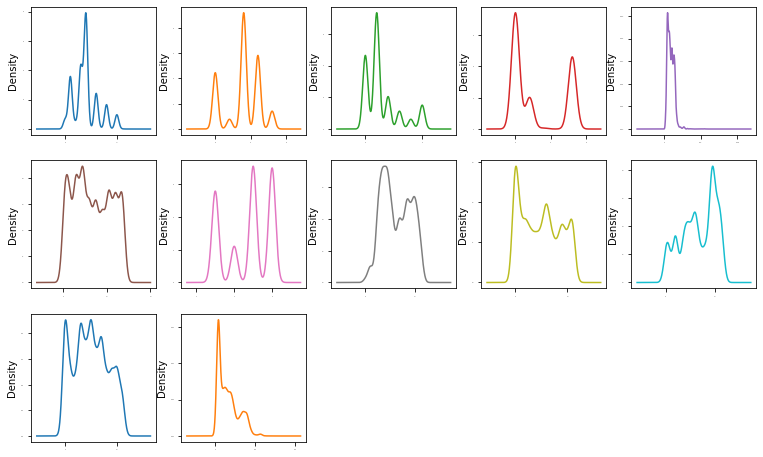

In [113]:
# checking data distribution among all columns.


df.plot(kind='density',subplots=True, layout=(3,5), sharex=False, legend=False, fontsize=1,figsize=(13,8))
plt.show()

In [114]:
###### Now the data is ready

In [115]:
# Making dataframe ready for ml

features=df.drop('Price',axis=1)
target=df["Price"]

In [116]:
features.shape

(10682, 11)

In [117]:
target

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

### Scaling 

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
ss=StandardScaler()
ss.fit_transform(features)

array([[-0.41080484, -1.65835945,  2.41653414, ..., -1.80043628,
        -0.8900139 , -0.93149578],
       [-1.26115217,  0.89001433, -0.97381203, ..., -0.05090913,
        -0.5870944 , -0.3899514 ],
       [ 0.01436882,  0.04055641, -0.2957428 , ..., -1.3630545 ,
         0.0187446 ,  0.97867893],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ..., -0.34249699,
        -0.2841749 , -0.91180326],
       [ 2.56541078, -1.65835945,  2.41653414, ...,  0.0948848 ,
        -0.8900139 , -0.9511883 ],
       [-1.26115217,  0.04055641, -0.2957428 , ...,  0.82385444,
        -0.5870944 , -0.28164253]])

#### Building Machine Learning Models

In [122]:
# importing libraries
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [123]:
for i in range (0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    
    print(f'At random state {i}, the training accuractarget is:  {r2_score(target_train,pred_train)}')
    print(f"At random state {i}, the testing accuractarget is:   {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuractarget is:  0.4194141279589707
At random state 0, the testing accuractarget is:   0.40737662936132724


At random state 1, the training accuractarget is:  0.4161865032340155
At random state 1, the testing accuractarget is:   0.42043173221096675


At random state 2, the training accuractarget is:  0.41595533720632294
At random state 2, the testing accuractarget is:   0.4194725098027352


At random state 3, the training accuractarget is:  0.4074019952823086
At random state 3, the testing accuractarget is:   0.4592633802812437


At random state 4, the training accuractarget is:  0.42227622261047293
At random state 4, the testing accuractarget is:   0.396720051504012


At random state 5, the training accuractarget is:  0.41961487151943755
At random state 5, the testing accuractarget is:   0.4070960810179164


At random state 6, the training accuractarget is:  0.418943985029662
At random state 6, the testing accuractarget is:   0.40865707274567487


At

At random state 51, the testing accuractarget is:   0.4582424804528471

In [124]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.2,random_state=51)

In [125]:
lr.fit(features_train,target_train)

LinearRegression()

In [126]:
pred_test=lr.predict(features_test)

In [127]:
print(r2_score(target_test,pred_test))

0.4582424804528471


In [128]:
pred=lr.predict(features_test)

In [129]:
print("Predicted Result",pred)

Predicted Result [11947.97280603 13544.29195398 12409.57172803 ... 10951.65694493
  3755.84662914 12156.94677135]


In [130]:
print("Actual Result",target_test)

Actual Result 8153     10703
2784     14053
10371     7480
9014      4049
8200     11841
         ...  
5816      8854
3868     14151
9103      9646
3296      4804
6213      4757
Name: Price, Length: 2137, dtype: int64


In [131]:
lr.score(features_train,target_train)

0.40785902131204554

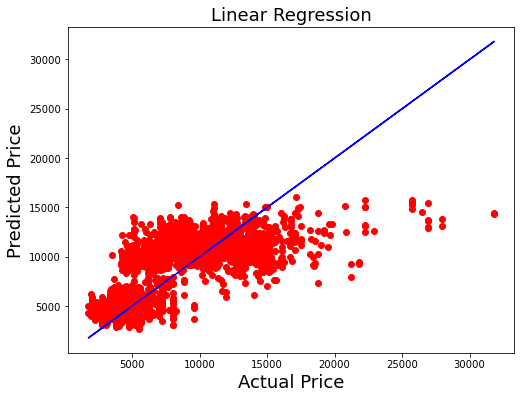

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test , color='red')
plt.plot(target_test,target_test,color='blue')
plt.xlabel("Actual Price",fontsize=18)
plt.ylabel("Predicted Price",fontsize=18)
plt.title("Linear Regression",fontsize=18)
plt.show()

##### Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
rfr=RandomForestRegressor()

In [136]:
rfr.fit(features_train,target_train)

RandomForestRegressor()

In [137]:
target_pred=rfr.predict(features_test)

In [138]:
rfr.score(features_train,target_train)

0.9522442616091933

In [139]:
rfr.score(features_test,target_test)

0.8325189876796428

In [140]:
# the testing score is 80% for RFR

#### DecisionTreeRegressor

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
dtr=DecisionTreeRegressor()

In [144]:
dtr.fit(features_train,target_train)

DecisionTreeRegressor()

In [145]:
dtr_target_pred=dtr.predict(features_test)

In [146]:
dtr.score(features_train,target_train)

0.9707544435379534

In [147]:
dtr.score(features_test,target_test)

0.7303268168022391

In [148]:
# the testing score is 71%

In [149]:
###### Importing Merics

In [150]:
from sklearn import metrics

In [151]:
print('MAE',metrics.mean_absolute_error(target_test,target_pred))
print('MSE',metrics.mean_squared_error(target_test,target_pred))
print('MAE',np.sqrt(metrics.mean_squared_error(target_test,target_pred)))

MAE 1122.8297573599646
MSE 3139648.562761579
MAE 1771.9053481384324


In [152]:
### Hyperparameter Tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200, num=12)] #no. of trees in forest
max_features = ['auto','squrt']                                          # features
max_depth = [int(x) for x in np.linspace(5,30,num=6)]                    # max no of trees
min_samples_split=[2,5,10,15,100]                                        # min samples to split
min_sample_leaf=[1,2,5,10]                                              # min sample at each leaf node

In [155]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_sample_leaf':min_sample_leaf}

In [156]:
# creating para list to pass GridSearchCV

parameters =  {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [157]:
# using cv =5
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = parameters ,n_iter=10,cv=5,verbose=2,random_state=51, n_jobs=1)

In [158]:
rf_random.fit(features_train,target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae, total=  34.0s
[CV] min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.9s remaining:    0.0s


[CV]  min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae, total=  34.8s
[CV] min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae 
[CV]  min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae, total=  34.3s
[CV] min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae 
[CV]  min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae, total=  33.5s
[CV] min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae 
[CV]  min_samples_split=40, min_samples_leaf=100, max_leaf_nodes=20, max_depth=6, criterion=mae, total=  33.8s
[CV] min_samples_split=20, min_samples_leaf=40, max_leaf_nodes=5, max_depth=2, criterion=mse 
[CV]  min_samples_split=20, min_samples_leaf=40, max_leaf_nodes=5, max_depth=2, criterion=mse, total=   0.3s
[CV] min_samples_split=20, min_samples_leaf=40, max_leaf_nodes=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 6, 8],
                                        'max_leaf_nodes': [5, 20, 100],
                                        'min_samples_leaf': [20, 40, 100],
                                        'min_samples_split': [10, 20, 40]},
                   random_state=51, verbose=2)

In [159]:
rf_random.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 40,
 'max_leaf_nodes': 100,
 'max_depth': 8,
 'criterion': 'mae'}

In [160]:
rfr_prediction = rf_random.predict(features_test)

In [163]:
rfr.score(features_test,rfr_prediction)

0.8008980842314759

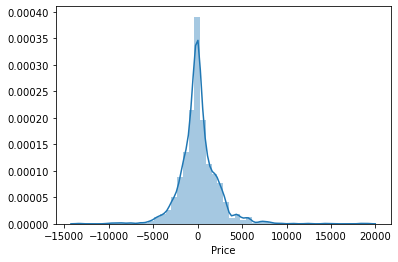

In [164]:
ax=sns.distplot(target_test-rfr_prediction)
plt.show()

In [228]:
import pickle

filename = 'flight_price.pkl'
pickle.dump(rf_random, open(filename,'wb'))

### TEST DATA

In [169]:
# using same steps as done in training data....

In [170]:
df_test=pd.read_excel('Flight Price Prediction_Test.xlsx')

In [171]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [172]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [173]:
df_test.drop(columns=['Additional_Info'],inplace=True)

In [174]:
df_test.shape

(2671, 9)

In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
dtypes: object(9)
memory usage: 187.9+ KB


In [176]:
#Extracting date time from Date_ofJourney.


df_test['JourneyDate']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.day
df_test['JourneyMonth']=pd.to_datetime(df_test.Date_of_Journey, format='%d/%m/%Y').dt.month

In [177]:
#dropping Date_of_Journey

df_test.drop(columns=['Date_of_Journey'],inplace=True)

In [178]:
# Extracting Departure time 


df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

# Now dropping the Dep_Time
df_test.drop(columns=['Dep_Time'],inplace=True)

In [179]:
#extracting Arrival time

df_test['Arrival_hr']=pd.to_datetime(df_test.Arrival_Time).dt.hour

df_test['Arrival_min']=pd.to_datetime(df_test.Arrival_Time).dt.minute

df_test.drop(columns=['Arrival_Time'],inplace=True)

In [180]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,24,6,23,55,2,45


###### Extracting duraion..

So in duration column
- I'm going to split the data in betwwn hr and mins
- check null values in new columns..
- clean it further..
- then convert hrs in mins by multi by 60
- then adding converted mins to mins..
- then adding new data in main data frame..

In [182]:
df_test['Duration'].str.split('h')

0       [10,  55m]
1            [4, ]
2       [23,  45m]
3           [13, ]
4        [2,  50m]
           ...    
2666    [23,  55m]
2667     [2,  35m]
2668     [6,  35m]
2669    [15,  15m]
2670    [14,  20m]
Name: Duration, Length: 2671, dtype: object

In [183]:
x=df_test['Duration'].str.split('h',expand=True)

In [184]:
x

,0,1
0,10,55m
1,4,
2,23,45m
3,13,
4,2,50m
...,...,...
2666,23,55m
2667,2,35m
2668,6,35m
2669,15,15m


In [185]:
x.isnull().sum()

0    0
1    1
dtype: int64

In [186]:
 x[1] = x[1].fillna(0)

In [187]:
x.rename(columns={0:'Duration_Hrs',1:'Duration_mins'},inplace=True)

In [188]:
x

,Duration_Hrs,Duration_mins
0,10,55m
1,4,
2,23,45m
3,13,
4,2,50m
...,...,...
2666,23,55m
2667,2,35m
2668,6,35m
2669,15,15m


In [189]:
x['Duration_mins'].unique()

array([' 55m', '', ' 45m', ' 50m', ' 20m', ' 5m', ' 15m', ' 40m', ' 10m',
       ' 35m', ' 30m', ' 25m', 0], dtype=object)

In [190]:
x['Duration_mins']=x.Duration_mins.str.replace(' None','0')

In [191]:
y=x['Duration_mins'].str.split(' ',expand=True)

In [192]:
y

,0,1
0,,55m
1,,None
2,,45m
3,,None
4,,50m
...,...,...
2666,,55m
2667,,35m
2668,,35m
2669,,15m


In [193]:
# further splitting coluns to extract just the numbers...

In [194]:
z=y[1].str.split('m',expand =True)

In [195]:
z

,0,1
0,55,
1,None,None
2,45,
3,None,None
4,50,
...,...,...
2666,55,
2667,35,
2668,35,
2669,15,


In [196]:
z.rename(columns={0:'min'}, inplace= True)

In [197]:
z['min'].unique()

array(['55', None, '45', '50', '20', '5', '15', '40', '10', '35', '30',
       '25', nan], dtype=object)

In [198]:
z['min']=z['min'].fillna(0)

In [199]:
z['min']=z['min'].astype(str).astype(int)

In [200]:
z.dtypes

min     int32
1      object
dtype: object

In [201]:
#concatnating two dataframes.....



durr=pd.concat([z,x],axis=1)

In [202]:
durr

,min,1,Duration_Hrs,Duration_mins
0,55,,10,55m
1,0,None,4,
2,45,,23,45m
3,0,None,13,
4,50,,2,50m
...,...,...,...,...
2666,55,,23,55m
2667,35,,2,35m
2668,35,,6,35m
2669,15,,15,15m


In [203]:
# DROPPING COLUMNS

durr.drop(columns=[1,'Duration_mins'],inplace=True)

In [204]:
durr['Duration_Hrs'].unique()

array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40', '5m'], dtype=object)

In [205]:
durr['Duration_Hrs']=durr.Duration_Hrs.str.replace('5m','0')

In [206]:
durr['Duration_Hrs']=durr['Duration_Hrs'].astype(str).astype(int)

In [207]:
#coverting hrs to mins...

durr['Duration_Hrs']=durr['Duration_Hrs']*60

In [208]:
durr['Duration_Hrs']

0        600
1        240
2       1380
3        780
4        120
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_Hrs, Length: 2671, dtype: int32

In [209]:
#adding Converted hr and mins....



durr['Total_Duration(mins)']=durr.sum(axis=1)

In [210]:
durr

,min,Duration_Hrs,Total_Duration(mins)
0,55,600,655
1,0,240,240
2,45,1380,1425
3,0,780,780
4,50,120,170
...,...,...,...
2666,55,1380,1435
2667,35,120,155
2668,35,360,395
2669,15,900,915


In [211]:
# now i'll be dropping min and hrs column 


durr.drop(columns=['min','Duration_Hrs'],inplace=True)

In [212]:
durr

,Total_Duration(mins)
0,655
1,240
2,1425
3,780
4,170
...,...
2666,1435
2667,155
2668,395
2669,915


In [213]:
#concatnating two dataframes.

df_test=pd.concat([df_test,durr],axis=1)

In [214]:
# dropping duration column from dataframe


df_test.drop(columns=['Duration'],inplace=True)

In [215]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,12,5,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,24,6,23,55,2,45,170


In [216]:
###### Route and stops are working in the same manner..

# Number of stops are equal to Routs

#so dropping route column

df_test.drop(columns=['Route'],inplace=True)

In [217]:
### Encoding 

In [218]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [219]:
for i in df_test.columns:
    if df_test[i].dtypes=="object":
        df_test[i]=le.fit_transform(df_test[i].values.reshape(-1,1))

In [220]:
### Pre-processing Pipeline

Airline
AxesSubplot(0.125,0.125;0.775x0.755)


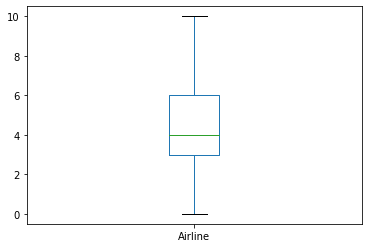

Source
AxesSubplot(0.125,0.125;0.775x0.755)


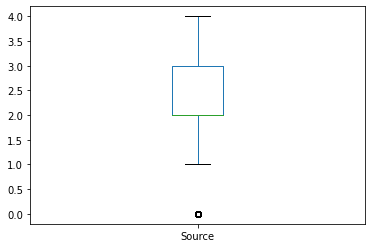

Destination
AxesSubplot(0.125,0.125;0.775x0.755)


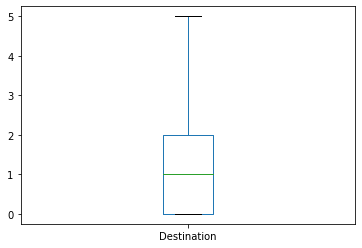

Total_Stops
AxesSubplot(0.125,0.125;0.775x0.755)


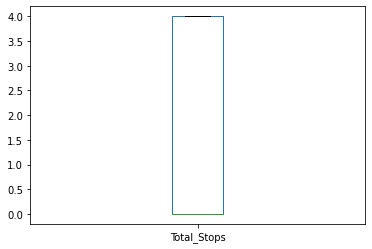

JourneyDate
AxesSubplot(0.125,0.125;0.775x0.755)


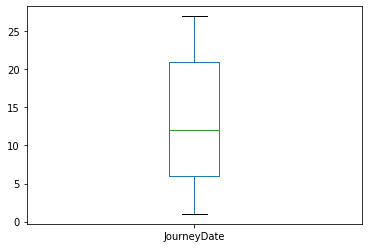

JourneyMonth
AxesSubplot(0.125,0.125;0.775x0.755)


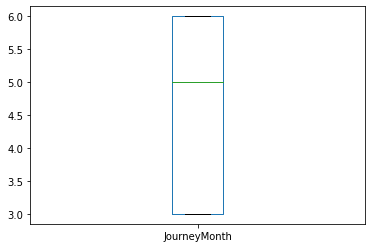

Dep_hr
AxesSubplot(0.125,0.125;0.775x0.755)


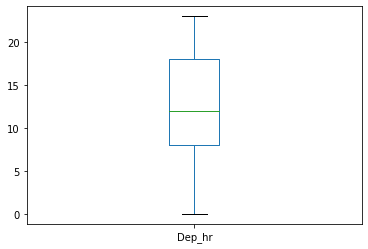

Dep_min
AxesSubplot(0.125,0.125;0.775x0.755)


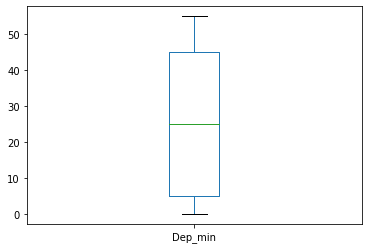

Arrival_hr
AxesSubplot(0.125,0.125;0.775x0.755)


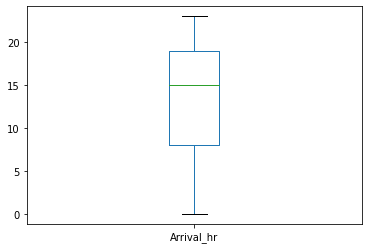

Arrival_min
AxesSubplot(0.125,0.125;0.775x0.755)


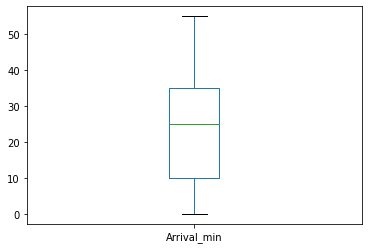

Total_Duration(mins)
AxesSubplot(0.125,0.125;0.775x0.755)


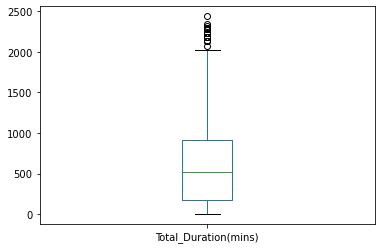

In [221]:
for i in df_test:
    print(i)
    print(df_test[i].plot.box())
    plt.show()

In [222]:
# checking skewness..



df_test.skew()

Airline                 0.483882
Source                 -0.424997
Destination             1.263630
Total_Stops             0.672623
JourneyDate             0.199540
JourneyMonth           -0.403700
Dep_hr                  0.093759
Dep_min                 0.128515
Arrival_hr             -0.443166
Arrival_min             0.115267
Total_Duration(mins)    0.896084
dtype: float64

In [223]:
### scaling

In [224]:
from sklearn.preprocessing import StandardScaler


ss=StandardScaler()
ss.fit_transform(df_test)

array([[ 0.01190758,  0.03256662, -0.29488167, ..., -1.36170869,
         0.02633999,  0.03039304],
       [-0.42377921,  0.87708559, -0.97622158, ..., -0.50932437,
        -0.27177067, -0.79614329],
       [ 0.01190758,  0.03256662, -0.29488167, ...,  0.76925212,
        -1.46421332,  1.56396648],
       ...,
       [ 0.01190758,  0.03256662, -0.29488167, ..., -1.36170869,
         0.02633999, -0.48743695],
       [-1.29515278,  0.03256662, -0.29488167, ...,  0.76925212,
        -0.56988133,  0.54822303],
       [ 0.88328115,  0.03256662, -0.29488167, ...,  0.76925212,
        -0.56988133,  0.43868207]])

In [225]:
df_test.head()

,Airline,Source,Destination,Total_Stops,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
0,4,2,1,0,6,6,17,30,4,25,655
1,3,3,0,0,12,5,6,20,10,20,240
2,4,2,1,0,21,5,19,15,19,0,1425
3,6,2,1,0,21,5,8,0,21,0,780
4,0,0,2,4,24,6,23,55,2,45,170


In [226]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,JourneyDate,JourneyMonth,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Total_Duration(mins)
0,3,0,5,4,3897,24,3,22,20,1,10,170
1,1,3,0,1,7662,1,5,5,50,13,15,445
2,4,2,1,1,13882,9,6,9,25,4,25,1140
3,3,3,0,0,6218,12,5,18,5,23,30,325
4,3,0,5,0,13302,1,3,16,50,21,35,285


In [227]:
# Test data is ready..!!

import pickle

filename = 'flight_price.pkl'
pickle.dump(rf_random, open(filename,'wb'))

In [230]:
# loading the model

fitted_model = pickle.load(open('flight_price.pkl','rb'))

In [231]:
fitted_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 6, 8],
                                        'max_leaf_nodes': [5, 20, 100],
                                        'min_samples_leaf': [20, 40, 100],
                                        'min_samples_split': [10, 20, 40]},
                   random_state=51, verbose=2)

In [232]:
# prediction on test data


predictions = fitted_model.predict(df_test)

In [233]:
predictions

array([11941.56 ,  5138.125, 12797.44 , ..., 16838.485, 10762.56 ,
        8043.945])